In [440]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from statistics import median
from scipy.stats import iqr
import warnings
warnings.filterwarnings('ignore')

In [441]:
df=pd.read_csv('bmw_pricing_challenge.csv')

In [442]:
df.columns

Index(['maker_key', 'model_key', 'mileage', 'engine_power',
       'registration_date', 'fuel', 'paint_color', 'car_type', 'feature_1',
       'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
       'feature_7', 'feature_8', 'price', 'sold_at'],
      dtype='object')

In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   maker_key          4843 non-null   object
 1   model_key          4843 non-null   object
 2   mileage            4843 non-null   int64 
 3   engine_power       4843 non-null   int64 
 4   registration_date  4843 non-null   object
 5   fuel               4843 non-null   object
 6   paint_color        4843 non-null   object
 7   car_type           4843 non-null   object
 8   feature_1          4843 non-null   bool  
 9   feature_2          4843 non-null   bool  
 10  feature_3          4843 non-null   bool  
 11  feature_4          4843 non-null   bool  
 12  feature_5          4843 non-null   bool  
 13  feature_6          4843 non-null   bool  
 14  feature_7          4843 non-null   bool  
 15  feature_8          4843 non-null   bool  
 16  price              4843 non-null   int64 


In [444]:
df.isnull().sum()

maker_key            0
model_key            0
mileage              0
engine_power         0
registration_date    0
fuel                 0
paint_color          0
car_type             0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
price                0
sold_at              0
dtype: int64

In [445]:
categorical_f = df.select_dtypes('object').columns
df[categorical_f].head()

,maker_key,model_key,registration_date,fuel,paint_color,car_type,sold_at
0,BMW,118,2012-02-01,diesel,black,convertible,2018-01-01
1,BMW,M4,2016-04-01,petrol,grey,convertible,2018-02-01
2,BMW,320,2012-04-01,diesel,white,convertible,2018-02-01
3,BMW,420,2014-07-01,diesel,red,convertible,2018-02-01
4,BMW,425,2014-12-01,diesel,silver,convertible,2018-04-01


In [446]:
for each in ['maker_key', 'model_key', 'fuel', 'paint_color',
       'car_type']:
     print(each, "=>",df[each].unique(), df[each].nunique())

maker_key => ['BMW'] 1
model_key => ['118' 'M4' '320' '420' '425' '335' '325' 'Z4' '120' '220' '650' '135'
 '218' '318' '430' 'M3' '330' '225' 'M235' '316' '435' '640'
 '640 Gran Coupé' '435 Gran Coupé' 'i8' '630' '430 Gran Coupé' '635' '520'
 '525' '530' '535' '320 Gran Turismo' '518' '116' '328' '523' 'X3' 'M550'
 '528' '325 Gran Turismo' '125' '318 Gran Turismo' '420 Gran Coupé' 'i3'
 '114' '520 Gran Turismo' '530 Gran Turismo' 'M135' '418 Gran Coupé'
 '330 Gran Turismo' '335 Gran Turismo' '730' '123' '535 Gran Turismo'
 '740' '750' 'ActiveHybrid 5' '735' 'M5' 'X5' 'X1' 'X4' 'X6' 'X6 M' 'X5 M'
 'X5 M50' '218 Active Tourer' '218 Gran Tourer' '216' '220 Active Tourer'
 '216 Gran Tourer' '216 Active Tourer' '225 Active Tourer'
 '214 Gran Tourer'] 75
fuel => ['diesel' 'petrol' 'hybrid_petrol' 'electro'] 4
paint_color => ['black' 'grey' 'white' 'red' 'silver' 'blue' 'orange' 'beige' 'brown'
 'green'] 10
car_type => ['convertible' 'coupe' 'estate' 'hatchback' 'sedan' 'subcompact' 'suv'
 '

In [447]:
df.duplicated().sum()

0

In [448]:
df.duplicated(['model_key', 'mileage', 'engine_power',
       'registration_date', 'fuel', 'paint_color', 'car_type', 'feature_1',
       'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
       'feature_7', 'feature_8', 'price', 'sold_at']).sum()

0

## Encoding

In [449]:
bool_f = df.select_dtypes('boolean').columns
# for col in bool_f:
#     print(col, df[col].unique())

In [450]:
for col in bool_f:
    df[col] = df[col].apply(lambda x: 1 if x==True else 0)
# df[bool_f].head()

In [451]:
df['feature_tot']=np.zeros(df.shape[0],dtype=int)
for col in bool_f:
    df['feature_tot']+=df[col]

## Fuel Encoding

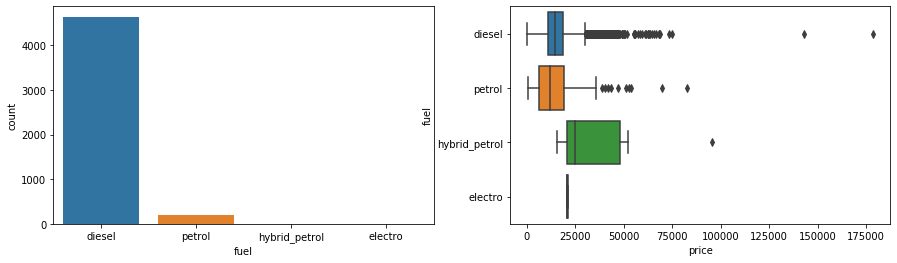

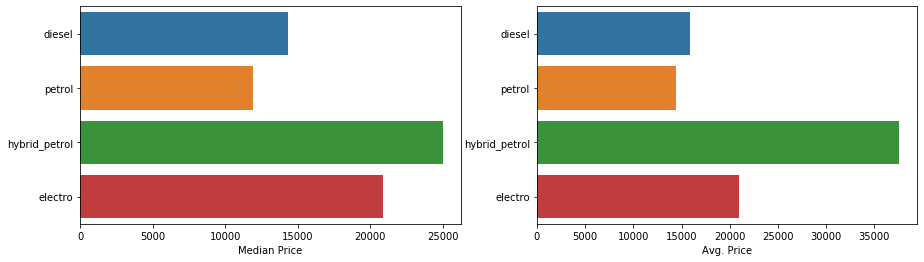

In [452]:
### plot frequency of each of the fuel types and five point summary on price for each fuel type
fig, ax = plt.subplots(1,2,figsize = (15,4))
sns.countplot(df.fuel, ax = ax[0])
sns.boxplot(x ='price',y = 'fuel', data = df, ax = ax[1])
plt.show()


### get plot normalised metrices on price for each fuel type
fuel_PU = []
for each in df.fuel.unique():
    x = df[df.fuel==each]
    fuel_PU.append(median(x['price'])) # getting median

fig, ax = plt.subplots(1,2,figsize = (15,4))
sns.barplot(fuel_PU, df.fuel.unique(), ax = ax[0])
ax[0].set_xlabel('Median Price')
# ax[1].set_ylabel('Fuel Type')

fuel_PU = []
for each in df.fuel.unique():
    x = df[df.fuel==each]
    fuel_PU.append(np.mean(x['price']))

sns.barplot(fuel_PU, df.fuel.unique(), ax = ax[1])
ax[1].set_xlabel('Avg. Price')
# ax[2].set_ylabel('Fuel Type')

plt.show()

- Quick observations:
    - Median price of hybrid-petrol cars are highest amongst all types, while petrol cars have lowest median price. If median is to be considered as deciding metric then, order of weightage for each fuel types follows:
        - {'diesel':2,'petrol':1,'hybrid_petrol':4, 'electro':3}
    - Average price for each fuel type suggest weightage as: 
        - {'diesel':2,'petrol':1,'hybrid_petrol':4, 'electro':3}
    - Negligible outliers impact on price by fuel type
    - Hence, fuel can be lacoded with the weightage assignment as follows:
     - {'diesel':2,'petrol':1,'hybrid_petrol':4, 'electro':3}

In [453]:
df['fuel_E'] = df.fuel.map({'diesel':2,'petrol':1,'hybrid_petrol':4, 'electro':3})

## Pain_Colour Encoding

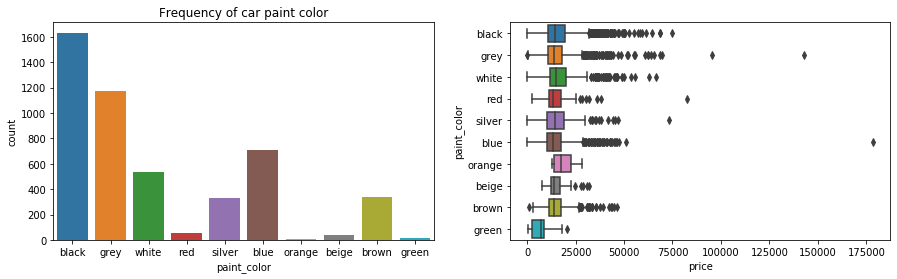

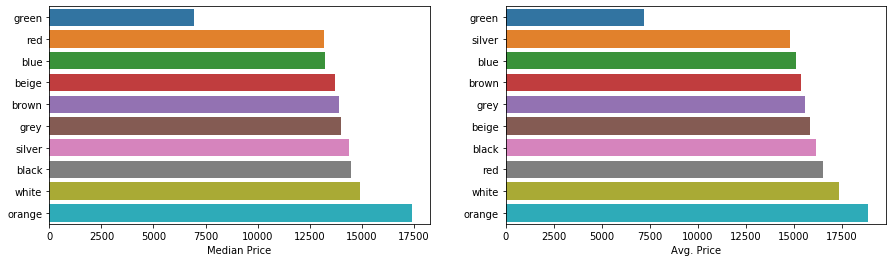

In [454]:
### plot frequency of each of the paint_color and five point summary on price for each paint_color  type
fig, ax = plt.subplots(1,2,figsize = (15,4))
sns.countplot(df.paint_color , ax = ax[0]).set_title('Frequency of car paint color')
sns.boxplot(x ='price',y = 'paint_color', data = df, ax = ax[1])
plt.show()


### get plot normalised metrices on price for each paint_color  type
paint_color_PU = []
for each in df.paint_color .unique():
    x = df[df.paint_color ==each]
    paint_color_PU.append(median(x['price'])) # getting median

fig, ax = plt.subplots(1,2,figsize = (15,4)) 
sns.barplot(sorted(paint_color_PU), df.paint_color.unique()[np.argsort(paint_color_PU)], ax = ax[0])
ax[0].set_xlabel('Median Price')
# ax[1].set_ylabel('paint_color  Type')

paint_color_PU = []
for each in df.paint_color .unique():
    x = df[df.paint_color ==each]
    paint_color_PU.append(np.mean(x['price']))

sns.barplot(sorted(paint_color_PU), df.paint_color.unique()[np.argsort(paint_color_PU)], ax = ax[1])
ax[1].set_xlabel('Avg. Price')
# ax[2].set_ylabel('paint_color  Type')

plt.show()

- Quick observations:
    - Orange cars have almost same median and average price and highest amost all.
    - Green cars have least median and average price.
    - Other colors of the cars median and average prices are changing in order.
    - All the cars paint colors except orange, white, silver and green, average price is within 5% of the total price.
 - following the observations below weightage can be used for label encoding
        - orange -> 5
        - white -> 4
        - remaing -> 3
        - silver -> 2
        - green -> 1

In [455]:
df['paint_color_E'] = df.paint_color.apply(lambda x : 5 if x == 'orange' else (
4 if x == 'white' else (
2 if x == 'silver' else (
1 if x == 'green' else 3))))

## model_key encoding

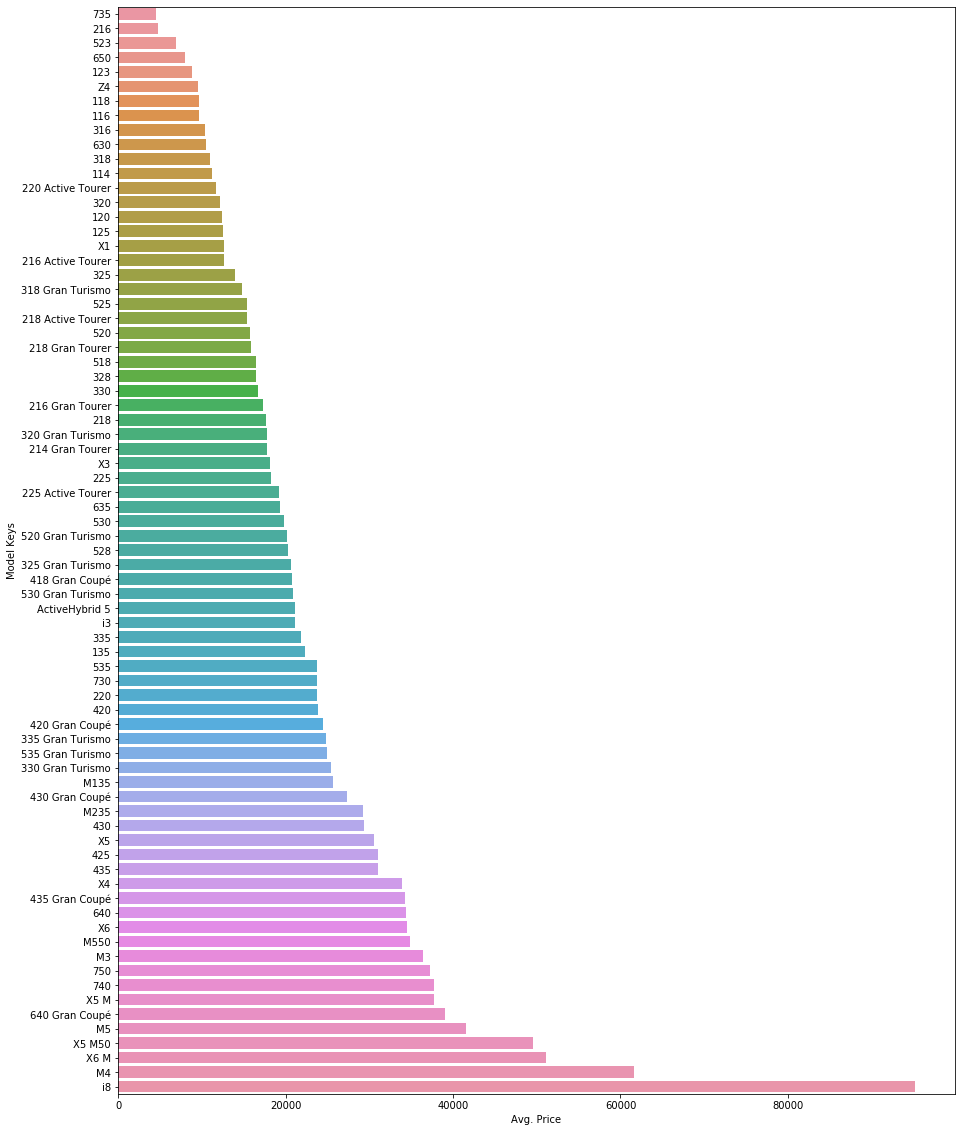

In [456]:
model_key_PU = []
for each in df.model_key.unique():
    x = df[df.model_key==each]
    model_key_PU.append(np.mean(x['price']))
    
len(model_key_PU)    
plt.figure(figsize = (15,20))
x = pd.concat([pd.DataFrame(df.model_key.unique(), columns=['Key']), pd.DataFrame(model_key_PU,columns=['value'])], axis = 1).sort_values('value')
sns.barplot(x='value',y='Key' ,data = x)
plt.xlabel('Avg. Price')
plt.ylabel('Model Keys')
plt.show()

In [457]:
groups_model_key={1:['i8'],
        2:['M4', 'X6 M', 'X5 M50', 'M5'],
        3:['640 Gran Coupé','X5 M','740', '750', 'M3', 'M550', 'X6', '640', '435 Gran Coupé', 'X4'],
        4:['435', '425', 'X5', '430', 'M235', '430 Gran Coupé'],
        5:['M135','330 Gran Turismo', '535 Gran Turismo', '335 Gran Turismo','420 Gran Coupé', '420', '220', '730', '535'],
        6:['135', '335', 'i3','ActiveHybrid 5', '530 Gran Turismo', '418 Gran Coupé','325 Gran Turismo', '528', '520 Gran Turismo', '530', '635','225 Active Tourer'],
        7:['225', 'X3', '214 Gran Tourer','320 Gran Turismo', '218', '216 Gran Tourer', '330', '328', '518','218 Gran Tourer', '520', '218 Active Tourer', '525','318 Gran Turismo', '325'],
        8:['216 Active Tourer', 'X1', '125', '120','320', '220 Active Tourer', '114', '318', '630', '316'],
        9:['116','118', 'Z4', '123', '650', '523'],
        10:['216', '735']}

def detect_func_model(elem):
    for key in groups_model_key.keys():
        if elem in groups_model_key[key]:
            return key
    
df['model_key_E']=df['model_key'].apply(detect_func_model)
# df

## Car Type Encoding

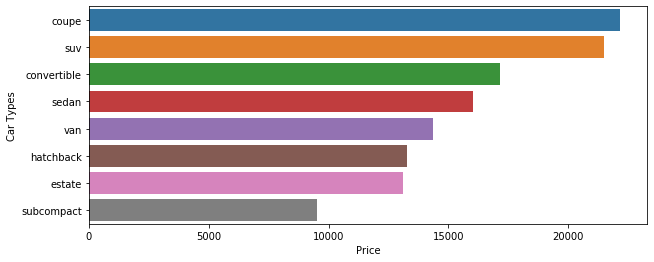

In [458]:
car_type = []
for each in df.car_type.unique():
    x = df[df.car_type==each]
    car_type.append(np.mean(x['price']))
    
x = pd.concat([pd.DataFrame(df.car_type.unique(), columns=['Key']), pd.DataFrame(car_type,columns=['value'])], axis = 1).sort_values('value', ascending= False)
plt.figure(figsize = (10,4))
sns.barplot(x='value',y='Key' ,data = x)
plt.xlabel('Price')
plt.ylabel('Car Types')
plt.show()

In [459]:
df['car_type_E'] = df.car_type.apply(lambda x : 1 if x == 'subcompact' else (
2 if x == 'estate' else (
3 if x == 'hatchback' else (
4 if x == 'van' else (
5 if x == 'sedan' else (
6 if x == 'convertible' else (
7 if x == 'suv' else 8)))))))

## date related features analysis

In [460]:
df.registration_date = pd.to_datetime(df.registration_date)
df.sold_at = pd.to_datetime(df.sold_at)
df['gap_reg_sold_year'] =  df.sold_at.dt.year - df.registration_date.dt.year 
df['reg_month'] = df.registration_date.dt.month
df['gap_reg_sold_days'] =  df.sold_at - df.registration_date 
df['gap_reg_sold_days'] = df.gap_reg_sold_days.apply(lambda x: int(str(x).split()[0]))
df['gap_reg_sold_months']= np.array([math.ceil(float(i)/30) for i in df['gap_reg_sold_days'].values])

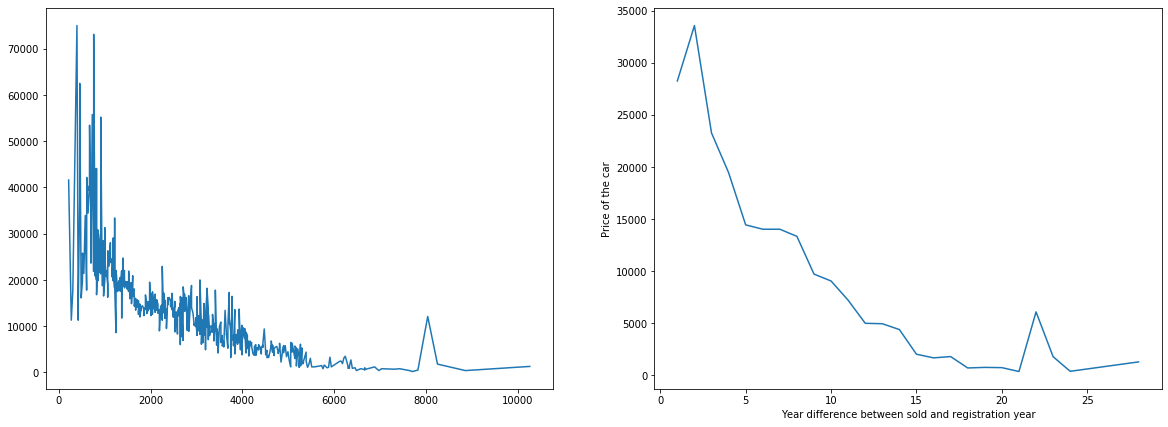

In [461]:
# ### hypothesis: How does the estimated value of a car change over time?

fig, ax = plt.subplots(1,2, figsize = (20,7))
x = df.groupby('gap_reg_sold_days')['price'].mean().reset_index()
ax[0].plot(x['gap_reg_sold_days'], x.price)
# hypothesis: as the car grows older, actual worth will decrease
plt.xlabel('days difference between sold and registration date')
plt.ylabel('Price of the car')

x = df.groupby('gap_reg_sold_year')['price'].mean().reset_index()
ax[1].plot(x['gap_reg_sold_year'], x.price)
# hypothesis: as the car grows older, actual worth will decrease
plt.xlabel('Year difference between sold and registration year')
plt.ylabel('Price of the car')
plt.show()

## Capturing interraction effects between features

###### relation between model_key and mileage

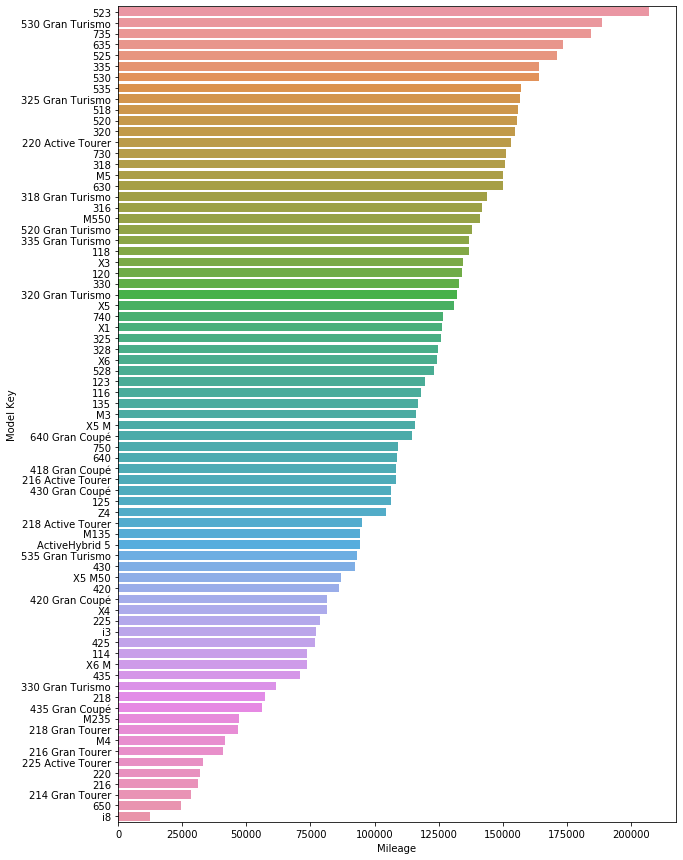

In [462]:
### relation between model_key and mileage
mileage_N = []
for each in df.model_key.unique():
    x = df[df.model_key==each]
    mileage_N.append(sum(x['mileage'])/len(x))
    
x = pd.concat([pd.DataFrame(df.model_key.unique(), columns=['Key']), pd.DataFrame(mileage_N,columns=['value'])], axis = 1).sort_values('value', ascending= False)
plt.figure(figsize = (10,15))
sns.barplot(x='value',y='Key' ,data = x)
plt.xlabel('Mileage')
plt.ylabel('Model Key')
plt.show()

In [463]:
df['model_key_mileage_rel'] = df.model_key.apply(lambda x : 5 if x == '523' else (
4 if x in ('530 Gran Turismo', '735', '635', '525', '335', '530') else (
3 if x in ('535', '325 Gran Turismo', '518', '520', '320',
       '220 Active Tourer', '730', '318', 'M5', '630', '318 Gran Turismo',
       '316', 'M550', '520 Gran Turismo', '335 Gran Turismo', '118', 'X3',
       '120', '330', '320 Gran Turismo', 'X5') else (
2 if x in ('X1', '740', '325', '328',
       'X6', '528', '640 Gran Coupé', '123', '116', '135', 'M3', 'X5 M',
       '750', '640', '418 Gran Coupé', '216 Active Tourer',
       '430 Gran Coupé', '125', 'Z4') else (
1)))))

###### interaction between model key and gap_reg_sold_days

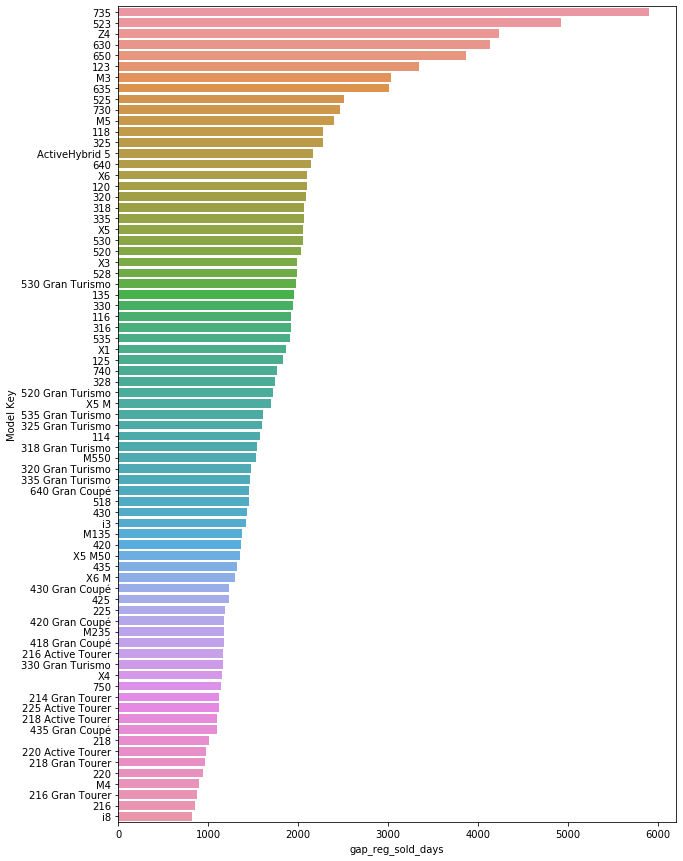

In [464]:
# interaction between model key and gap_reg_sold_days
x=df.groupby('model_key')['gap_reg_sold_days'].mean().reset_index()
x.sort_values(by='gap_reg_sold_days',ascending=False,inplace=True)

plt.figure(figsize = (10,15))
sns.barplot(x='gap_reg_sold_days',y='model_key' ,data = x)
plt.xlabel('gap_reg_sold_days')
plt.ylabel('Model Key')
plt.show()


In [465]:
groups_model_key_gap_days={1:['735'],
        2:['523'],
        3:['Z4','630'],
        4:['650'],
        5:['123'],
        6:['M3', '635'],
        7:['525', '730','M5', '118', '325'],
        8:['ActiveHybrid 5', '640', 'X6', '120', '320','318', '335', 'X5', '530', '520'],
        9:['X3', '528', '530 Gran Turismo', '135', '330', '116', '316', '535'],
        10:['X1', '125', '740', '328','520 Gran Turismo', 'X5 M'],
        11:['535 Gran Turismo', '325 Gran Turismo','114', '318 Gran Turismo', 'M550', '640 Gran Coupé','320 Gran Turismo', '335 Gran Turismo', '518', '430', 'i3'],
        12:['M135','420', 'X5 M50', '435', 'X6 M',],
        13:['430 Gran Coupé', '425', '225','420 Gran Coupé', 'M235', '418 Gran Coupé', '216 Active Tourer','330 Gran Turismo', 'X4', '750', '214 Gran Tourer','225 Active Tourer', '218 Active Tourer', '435 Gran Coupé'], 
        14:['218','220 Active Tourer', '218 Gran Tourer', '220', 'M4','216 Gran Tourer', '216', 'i8']}

# code for checking if all keys are covered
# tot_l=0
# for key in groups_model_key_gap_days.keys():
#     l=len(groups_model_key_gap_days[key])
# #     print(groups_model_key[key])
#     tot_l+=l;
# print(tot_l)
# print(len(x.model_key.values))

def detect_func_model_days(elem):
    for key in groups_model_key_gap_days.keys():
        if elem in groups_model_key_gap_days[key]:
            return key
    
df['model_key_gap_days_rel']=df['model_key'].apply(detect_func_model_days)
# df

In [466]:
# x.model_key.values

###### bucketing price in range of 100

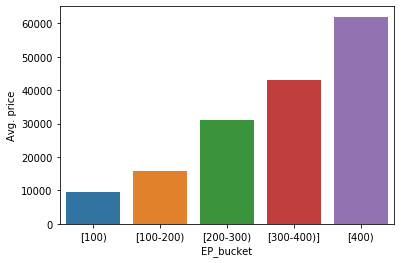

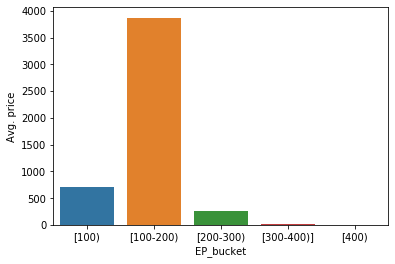

,count,mean,std,min,25%,50%,75%,max
EP_bucket,,,,,,,,
[100),712.0,9696.910112,3646.008781,100.0,8300.0,10000.0,11400.0,28000.0
[100-200),3869.0,15870.793487,8188.184157,100.0,11800.0,14800.0,18800.0,178500.0
[200-300),251.0,31214.741036,13103.223338,4500.0,21800.0,29500.0,39250.0,75000.0
[300-400)],9.0,43133.333333,15505.402284,22000.0,28600.0,47000.0,52400.0,69700.0
[400),2.0,62000.000000,28849.956672,41600.0,51800.0,62000.0,72200.0,82400.0


In [467]:
### bucketing price in range of 100
df['EP_bucket'] = df.engine_power.apply(lambda x: '[100)' if x < 100 else ('[100-200)'  if x < 200 else ('[200-300)' if x < 300 else ('[300-400)]' if x < 400 else '[400)') )))
x = df.groupby('EP_bucket')['price'].mean().reset_index()
sns.barplot(x = x.EP_bucket, y = x.price).set_ylabel('Avg. price')
plt.show()
x = df.groupby('EP_bucket')['price'].count().reset_index()
sns.barplot(x = x.EP_bucket, y = x.price).set_ylabel('Avg. price')
plt.show()
df.groupby('EP_bucket')['price'].describe()

# Target analysis

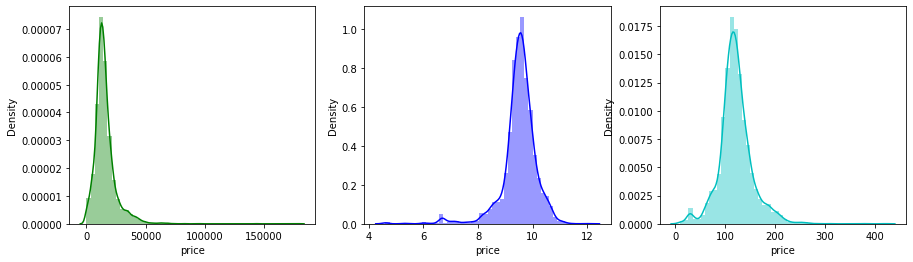

In [468]:
fig, ax = plt.subplots(1,3,figsize = (15,4))
sns.distplot(df.price, color = 'green', ax = ax[0])
sns.distplot(np.log(df.price), color = 'blue', ax = ax[1])
sns.distplot(np.sqrt(df.price), color = 'c', ax = ax[2])
plt.show()

## Data validation or outlier Removal

In [469]:
# Data Validation issue
### drop records where mileage is negative and engine_power is 0
df.drop(df[df.mileage < 0].index, axis = 0,inplace=True)
df.drop(df[df.engine_power <= 0].index, axis = 0,inplace=True)

In [470]:
# df[df.price<200]

In [471]:
# df[df.model_key=='320']

In [472]:
# df.mileage.mean()

## Correlation matrix

In [473]:
# df.corr()

## Modelling

In [555]:
# import packages
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, Normalizer,RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_log_error,mean_squared_error

In [475]:
features = ['mileage', 'engine_power', 'feature_1',
       'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
       'feature_7', 'feature_8', 'fuel_E', 'paint_color_E',
       'model_key_E', 'car_type_E', 'model_key_mileage_rel','gap_reg_sold_days',
        'gap_reg_sold_year','feature_tot','model_key_gap_days_rel']

target = 'price'

In [476]:
## splitting data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size = 0.2, random_state = 42 )

In [477]:
### Model with default parameters; features scaling has not happened
RFModel = RandomForestRegressor().fit(X_train,y_train) # training
## 
print('Train R^2 score {}'.format(r2_score(y_train, RFModel.predict(X_train))))
print('Test R^2 score {}'.format(r2_score(y_test, RFModel.predict(X_test))))

print('Train mean_squared_log_error {}'.format(mean_squared_log_error(y_train, RFModel.predict(X_train))))
print('Test mean_squared_log_error {}'.format(mean_squared_log_error(y_test, RFModel.predict(X_test))))

Train R^2 score 0.9687602665569895
Test R^2 score 0.8537976197428571
Train mean_squared_log_error 0.036486590464870135
Test mean_squared_log_error 0.14861477461519662


In [478]:
## scaling features
scaler1 = StandardScaler().fit(X_train,y_train)
X_train = scaler1.transform(X_train)
X_test = scaler1.transform(X_test)

In [479]:
## Get r-suqare score with each models
for model in [LinearRegression(), Ridge(), RandomForestRegressor(),SVR()]:
    scores = cross_val_score(model, X_train, y_train, cv= 5, scoring='r2',n_jobs=-1)
#     print('Model =>',str(model))
    print('Avg. R^2_score: {}, std:{}, scores:{}'.format(np.mean(scores),np.std(scores), scores))

Avg. R^2_score: 0.7485375149038527, std:0.12751680850879576, scores:[0.80777815 0.49465356 0.79242012 0.82871822 0.81911752]
Avg. R^2_score: 0.7485541191371755, std:0.12755857083056335, scores:[0.80785046 0.49458193 0.79247938 0.82871055 0.81914827]
Avg. R^2_score: 0.8133202929996017, std:0.1365521370792171, scores:[0.86541272 0.54072142 0.88647105 0.88637378 0.88762249]
Avg. R^2_score: -0.01650125929200579, std:0.011139178325419743, scores:[-0.01253229 -0.00803646 -0.0113365  -0.01204398 -0.03855707]


In [480]:
### Model with default parameters; features are scaled
RFModel = RandomForestRegressor(random_state=42).fit(X_train,y_train) # training
## 
print('Test R^2 score {}'.format(r2_score(y_test, RFModel.predict(X_test))))
print('Test mean_squared_log_error {}'.format(mean_squared_log_error(y_test, RFModel.predict(X_test))))

Test R^2 score 0.8578839294289092
Test mean_squared_log_error 0.14669652750061984


## Hyper parameter Tunning

#### Hyper parameters tunning
    - GridSearchCV() => adv(we cover whole feature space) ; dis(computationally expensive)
    - RandomSearchCV() => adv(might miss few feature space) ; adv(computationally inexpensive)
    -  Normal Loop
    
 Hyper parameters of randomforest
- no. of trees
- no. samples 
- depth
- max features

In [481]:
RFModel=RandomForestRegressor()

### Coarse grid

In [482]:
# param_c1 = {'n_estimators':range(100,1000,100)}
# # descending order score-  200,100,300, fine tune- 100-300

# param_c2 = {'max_depth': range(1,30,4)} 
# # descending order score- 17,13,25,21-- fine tune over 13 to 25

# param_c3={'n_estimators':range(100,1000,100),'max_depth': range(1,30,4)}
# # (17,100),(17,200),(13,200),(13,100) -- fine tune over 17+- keep n_esti bet 50 to 200

# # param_c4={'min_samples_leaf':range(0,8,1)}  #2,3,4,6,5

# # param_c5={'min_samples_split':range(0,12,1)}

# param_c6={'n_estimators':[800],'max_depth': [21],'min_samples_leaf':[3],'min_samples_split':range(0,12,1)}
# 800,21,3,2
# grid_c = GridSearchCV(estimator = RFModel, param_grid=param_c6, cv=3, scoring = 'r2', n_jobs = -1)
# grid_c = grid_c.fit(X_train,y_train)
# grid_c.best_params_

In [483]:
# pd.DataFrame(grid_c.cv_results_).sort_values(by = 'mean_test_score', ascending = False).head(10)

### Fine Grid

In [484]:
# param_f1={'n_estimators':range(50,200,20),'max_depth': range(13,25,2)}
# #(17,190),(17,170),(17,90),(17,150),(15,150)

# param_f2={'n_estimators':range(50,300,20),'max_depth': range(15,19,1)}
# #(18,150),(18,130),(17,190),(17,170),(18,170)

# param_f3={'n_estimators':range(80,190,10),'max_depth': range(15,19,1)}
# #(18,140),(18,150),(18,130),(18,160),(17,180)

# param_f4={'n_estimators':range(100,190,10),'max_depth': range(17,21,1)}
# #(20,150),(20,130),(20,140),(20,120),(20,170),(20,180)

# param_f5={'n_estimators':range(100,190,10),'max_depth': range(17,23,1)}
# #(20,150),(20,130),(20,140),(20,120),(20,170),(20,180)



# grid_f = GridSearchCV(estimator = RFModel, param_grid=param_f5, cv=3, scoring = 'r2', n_jobs = -1)
# grid_f = grid_f.fit(X_train,y_train)
# grid_f.best_params_

In [485]:
# pd.DataFrame(grid_f.cv_results_).sort_values(by = 'mean_test_score', ascending = False)

In [486]:
# final_model=grid_f.best_estimator_

In [487]:
# final_model.fit(X_train,y_train)

In [488]:
# print(r2_score(y_train,final_model.predict(X_train)))
# print(r2_score(y_test,final_model.predict(X_test)))

In [489]:
# print(final_model.feature_importances_)

## Cross Validation

In [490]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,StratifiedKFold

In [561]:
#['model_key_E','gap_reg_sold_days','mileage','engine_power','feature_8','car_type_E','feature_5','feature_3','feature_4','feature_7','feature_6','feature_1','gap_reg_sold_year','model_key_mileage_rel','paint_color_E','fuel_E']
# finalised model with hperparameters and train_test split
final_model=RandomForestRegressor(max_depth=21,n_estimators=150,min_samples_leaf=3,min_samples_split=2)
# train_df,test_df=train_test_split(df[features].iloc[:],test_size=0.2,random_state=42)

# final_model=LinearRegression(fit_intercept=True)
train_df=pd.concat([df[features],df[target]],axis=1).iloc[:]
feat_imp=pd.DataFrame(index=train_df.iloc[:,:-1].columns)
result_df=train_df.iloc[:]
col=0
folds=5

kscores_lr_val = []
kscores_lr_train =[]
cv = KFold(n_splits=folds, shuffle=True)
for train_index, val_index in cv.split(train_df.values):
#     print("Train Index: ", train_index, "\n")
#     print("Test Index: ", test_index)
    
    train_new_df= train_df.iloc[train_index,:]
    val_df=train_df.iloc[val_index,:]
    
    scaler2 = RobustScaler().fit(train_new_df.iloc[:,:-1])
    train_new_df.iloc[:,:-1] = scaler2.transform(train_new_df.iloc[:,:-1])
    val_df.iloc[:,:-1] = scaler2.transform(val_df.iloc[:,:-1])
    
    X_train_new, X_val_new, y_train_new, y_val_new = train_new_df.iloc[:,:-1],val_df.iloc[:,:-1],train_new_df.iloc[:,-1],val_df.iloc[:,-1]
    final_model.fit(X_train_new, y_train_new)
    
    kscores_lr_train.append(final_model.score(X_train_new, y_train_new))
    kscores_lr_val.append(final_model.score(X_val_new, y_val_new))  
    
    feat_imp[col]=final_model.feature_importances_

    result_df[col]=final_model.predict(scaler2.transform(train_df.iloc[:,:-1]))
    result_df[col+folds]=abs(result_df[col]-result_df['price'])
    result_df[col+2*folds]=abs(result_df[col]/result_df['price'])
    result_df[col+3*folds]=abs(np.log10(result_df[col]/result_df['price']))
    col+=1

print("Train Scores: ",kscores_lr_train)
print("Validation Scores: ",kscores_lr_val)

print()
print("train-validation error differences:",abs(np.array(kscores_lr_val)-np.array(kscores_lr_train)))
print()
print("Average train-validation error difference:",abs(np.array(kscores_lr_val)-np.array(kscores_lr_train)).mean(),"\n std dev of train-val error differnces: ",abs(np.array(kscores_lr_val)-np.array(kscores_lr_train)).std())
arr_score_lr=np.array(kscores_lr_val)
print()
print("mean validation accuracy:", arr_score_lr.mean(),"\t std dev of validation accuracy",arr_score_lr.std())
print("Adjusted R2: ",1-(1-arr_score_lr.mean())*((train_df.shape[0]-1)/(train_df.shape[0]-(train_df.shape[1]-1)-1)))

Train Scores:  [0.888936762337957, 0.9095200454316261, 0.9319263773294467, 0.8881462638535318, 0.8906834680660342]
Validation Scores:  [0.8884165360211977, 0.766800032583544, 0.6400028112726277, 0.8841084338310445, 0.8721218802915336]

train-validation error differences: [0.00052023 0.14272001 0.29192357 0.00403783 0.01856159]

Average train-validation error difference: 0.09155264460372965 
 std dev of train-val error differnces:  0.11317247374200513

mean validation accuracy: 0.8102899387999896 	 std dev of validation accuracy 0.0961927254368684
Adjusted R2:  0.8095422741738124


In [562]:
result_df.to_excel(r'C:\Users\HP\Python notebooks\project sessions with rageeni\results.xlsx',index=True)

In [553]:
tot=0
for i in range(folds):
    tot+=feat_imp[i]
feat_imp['final']=tot/folds
feat_imp.sort_values(by='final')

,0,1,2,3,4,final
fuel_E,0.000287,0.000654,0.000490,0.000480,0.000354,0.000453
paint_color_E,0.001475,0.001157,0.001631,0.001649,0.001476,0.001478
feature_1,0.001912,0.000995,0.002251,0.002593,0.001646,0.001880
feature_2,0.002363,0.000707,0.002313,0.001879,0.002897,0.002032
feature_6,0.003187,0.002275,0.002206,0.002761,0.002859,0.002658
feature_4,0.002152,0.003162,0.003835,0.003101,0.002894,0.003028
model_key_mileage_rel,0.004354,0.003871,0.003594,0.004391,0.003679,0.003978
feature_5,0.004018,0.004115,0.004853,0.003752,0.003528,0.004053
feature_3,0.005354,0.001404,0.005353,0.006759,0.003828,0.004540
feature_7,0.005527,0.000939,0.004644,0.005646,0.007085,0.004768


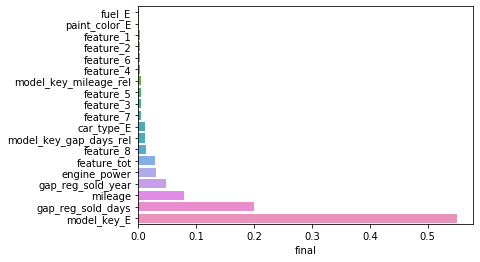

In [554]:
feat_imp.sort_values(by='final',inplace=True)
sns.barplot(x=feat_imp['final'],y=feat_imp.index)
plt.show()